Full Points: Working code that yields correct results

You will be graded on the dashboards displaying the specified data and the screenshots you took during the final project lab questions. There are 12 possible points for this assignment. Here is the breakdown:

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

Question 7 - Sharing your Assignment Notebook - 2 Points

For each problem points will be awarded as follows:

Full Points: Working code that yields correct results
Partial Points: Partially correct code or results
No Points: Did not attempt the problem or did not upload any solution

In [3]:
!pip -q install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip -q install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━━━━╸━━━━━━━━━   0.0 B /  ??.?MB @ 

In [4]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import warnings 
warnings.filterwarnings('ignore', category= FutureWarning)

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows = 2, cols= 1, shared_xaxes= True, subplot_titles= ('Historical  Share Price', 'Historical Revenue'), vertical_spacing= .3)
    fig.add_trace(go.Scatter(x = pd.to_datetime(stock_data.Date, infer_datetime_format= True), y= stock_data.Close.astype('float'), name = 'Share Price'), row = 1, col= 1)
    fig.add_trace(go.Scatter(x = pd.to_datetime(revenue_data.Date, infer_datetime_format= True), y= revenue_data.Close.astype('float'), name= 'Revenue'), row = 2, col= 1)
    fig.update_xaxes(title_text = 'Date', row= 1, col= 1)
    fig.update_xaxes(title_text = 'Date', row= 2, col= 1)
    fig.update_yaxes(title_text = 'Price($US)', row= 1, col= 1)
    fig.update_yaxes(title_text = 'Revenue ($US Millions)', row= 2, col= 1)
    fig.update_layout(showlegend = False, height = 900, title = stock, xaxis_rangeslider_visible = True)
    fig.show()

# Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points


Using the `Ticker` funcition enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tela and its ticker symbol is `TSLA`

In [7]:
tesla = yf.Ticker('TSLA')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`.Set the `period` parameter to `max` so we get information for the maximum amount of time

In [8]:
tesla_data = tesla.history(period= 'max')

Reset the index using the `reset_index(inplace = True)` function on the `tesla_data` DataFrame and display the first five rows of the `tesla_data` DataFrame using the `head` function. Take a screenshort of the result

In [9]:
tesla_data = pd.DataFrame(tesla_data)
tesla_data.reset_index(inplace= True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.

In [10]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

In [11]:
soup = BeautifulSoup(html_data, 'html5lib')

Using `BeautifulShoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Data` and `Revenue`

In [13]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = tesla_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index = True)

Display the first 5 row of the tesla_revenue dataframe using `head` function. 

In [15]:
tesla_revenue.head()

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


Execute the following line to remove the comma and dollar sign from the `Revenue` column

In [38]:
tesla_revenue['Revenue']= tesla_revenue['Revenue'].str.replace('$|\,', '')

Display the last 5 row of the tesla_revenue dataframe using `tail` function. 

In [39]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


# Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on create a ticker object. The stock is GameStop and its ticker symbol is `GME`

In [19]:
gme = yf.Ticker('GME')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `'max'` so we get information for the maximum amount of time

In [20]:
gme_data = gme.history(period = 'max')

Reset the index using the `reset_index(inplace= True)` function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the `head` function.

In [21]:
gme_data = pd.DataFrame(gme_data)
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

Using the `requests` libraly to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`

In [22]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parse`.

In [23]:
soup2 = BeautifulSoup(html_data_2, 'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Data` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column

In [41]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup2.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    gme_revenue = gme_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index = True)
    
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$', '')
gme_revenue.head()

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


# Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

Use the `make_graph` function to graph the Tesla Stock Data , also provide a title for the graph.

In [51]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

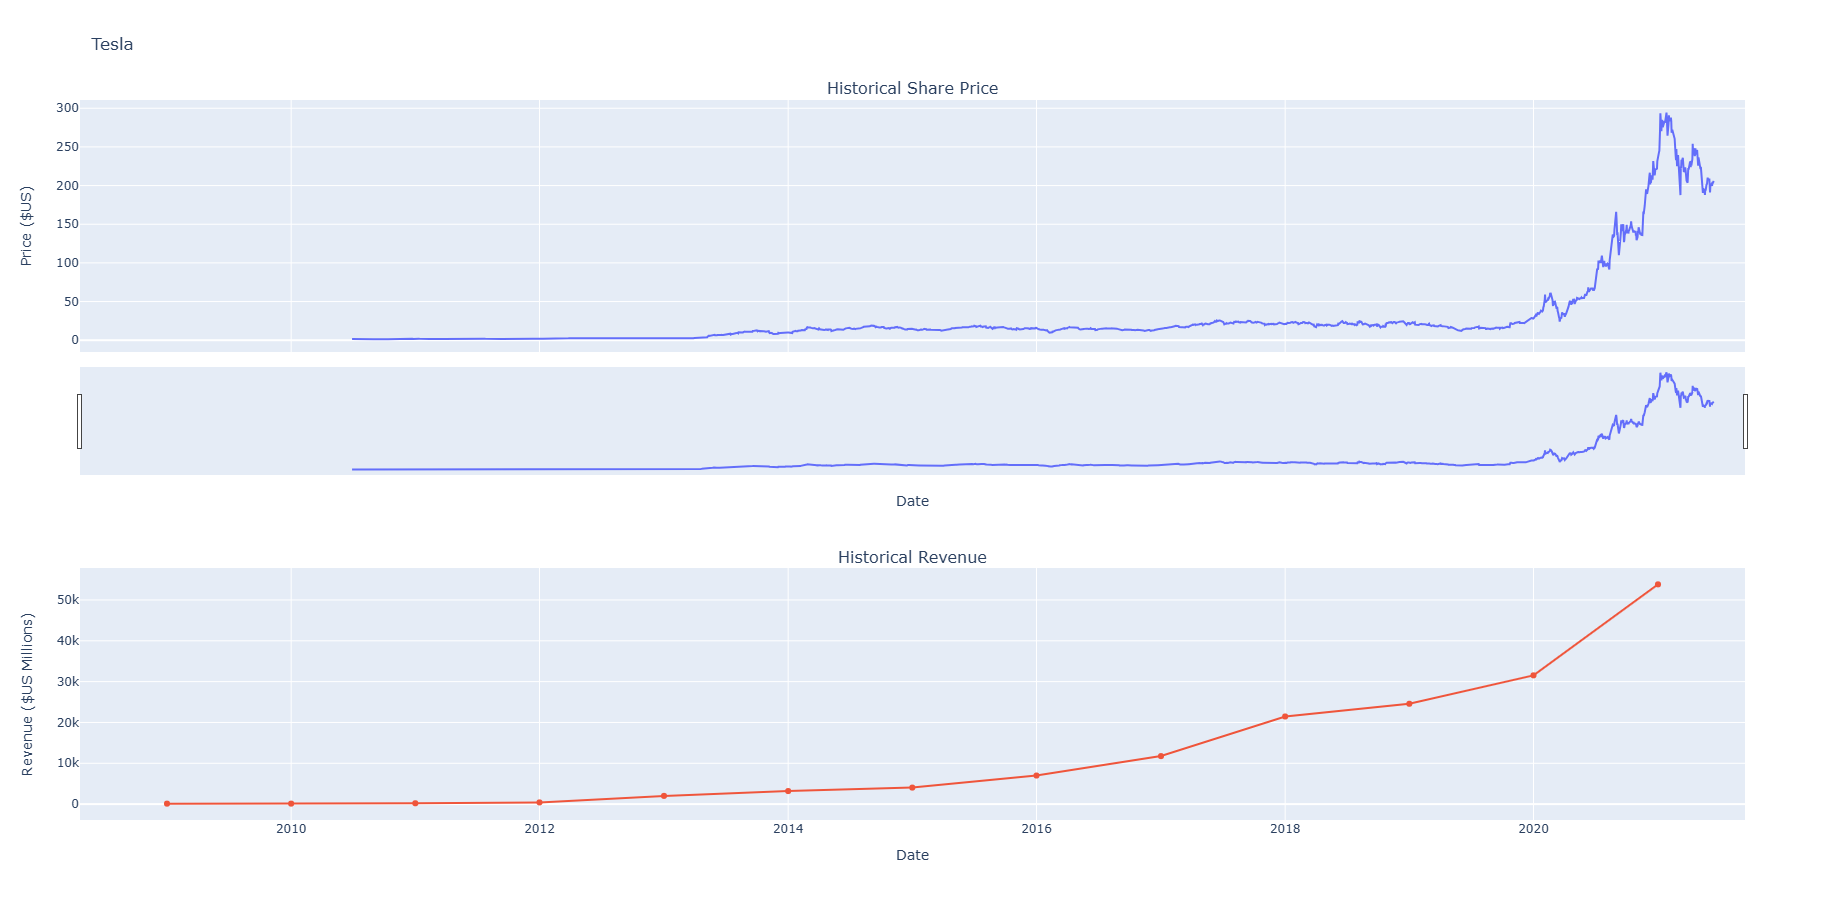

In [52]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

# Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

Use the `make_graph` function to graph the Tesla Stock Data , also provide a title for the graph.

In [53]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

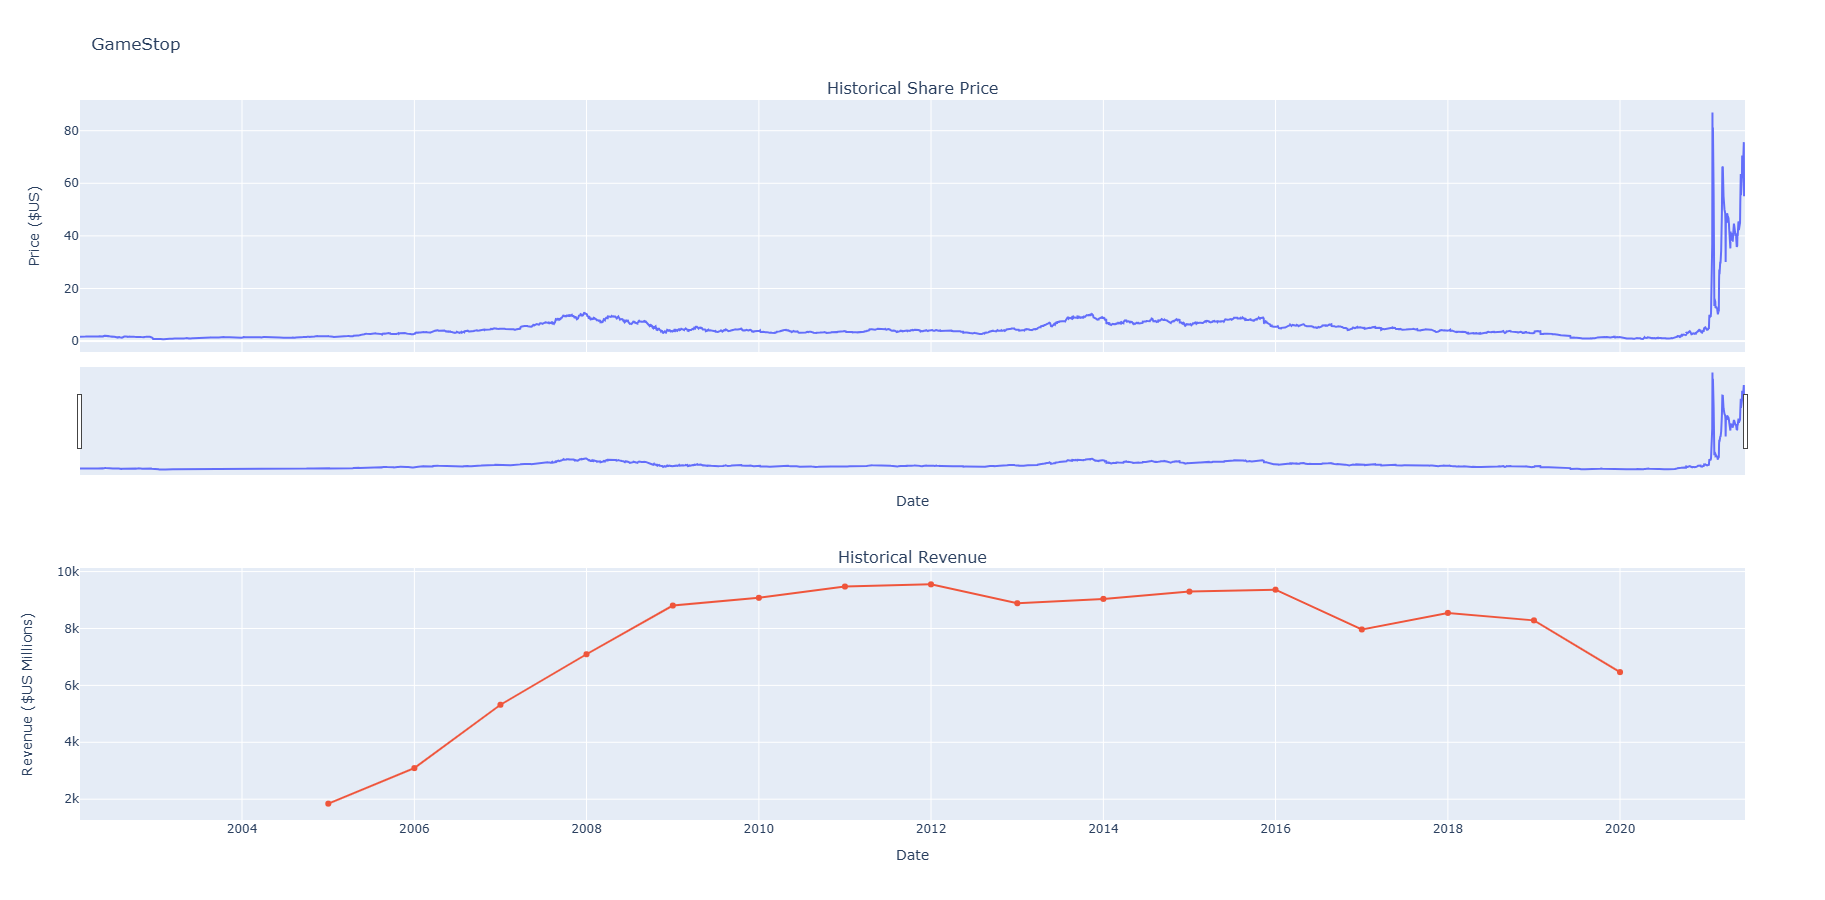

In [54]:
make_graph(gme_data, gme_revenue, 'GameStop')